# Feature Engineering for processed music and fashion data

Create meaningful columns for datasets. Combine, aggregate, derive new features to enhance data.

In [26]:
import pandas as pd
from scripts.music_info import get_track_genres, get_artist_genres
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
customer_df = pd.read_csv('../datasets/processed/fashion_data/customers.csv')
discounts_df = pd.read_csv('../datasets/processed/fashion_data/discounts.csv')
products_df = pd.read_csv('../datasets/processed/fashion_data/products.csv')
transactions_df = pd.read_csv('../datasets/processed/fashion_data/transactions.csv')
music_features_df = pd.read_csv('../datasets/processed/music_data/music_features.csv')
music_info_df = pd.read_csv('../datasets/processed/music_data/music_info.csv')

## Initial EDA

### Row Counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1643306 entries, 0 to 1643305
Data columns (total 6 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   Customer ID  1643306 non-null  int64 
 1   City         1643306 non-null  object
 2   Country      1643306 non-null  object
 3   Gender       1643306 non-null  object
 4   Job Title    1643306 non-null  object
 5   Age          1643306 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 75.2+ MB


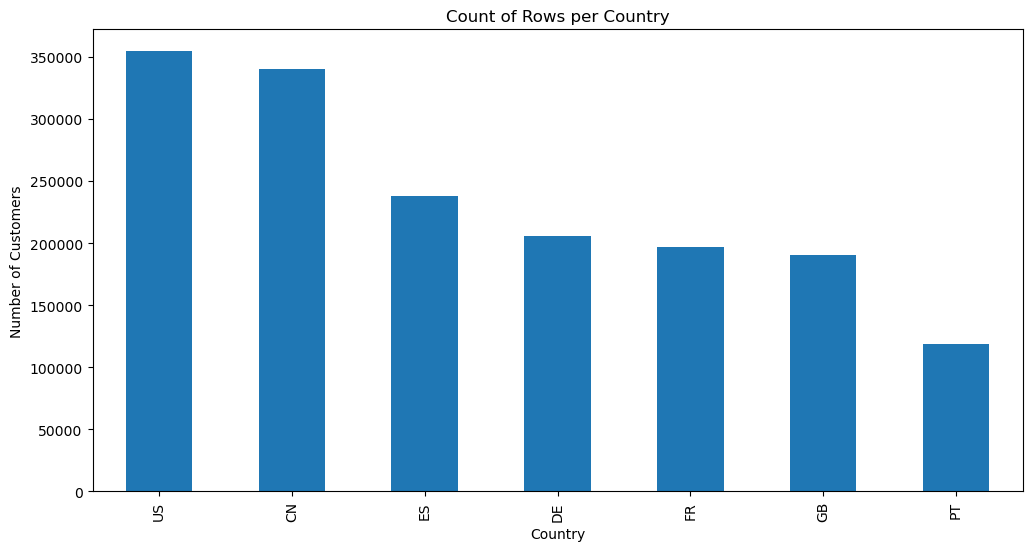

In [6]:
customer_df.info()
country_counts = customer_df["Country"].value_counts()

country_counts.plot(kind="bar", figsize=(12,6))

plt.xlabel("Country")
plt.ylabel("Number of Customers")
plt.title("Count of Rows per Country")
plt.show()

In [7]:
discounts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Discont       181 non-null    float64
 1   Category      181 non-null    object 
 2   Sub Category  181 non-null    object 
 3   Season        181 non-null    object 
dtypes: float64(1), object(3)
memory usage: 5.8+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17940 entries, 0 to 17939
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Product ID      17940 non-null  int64 
 1   Category        17940 non-null  object
 2   Sub Category    17940 non-null  object
 3   Description EN  17940 non-null  object
 4   Color           17940 non-null  object
dtypes: int64(1), object(4)
memory usage: 700.9+ KB


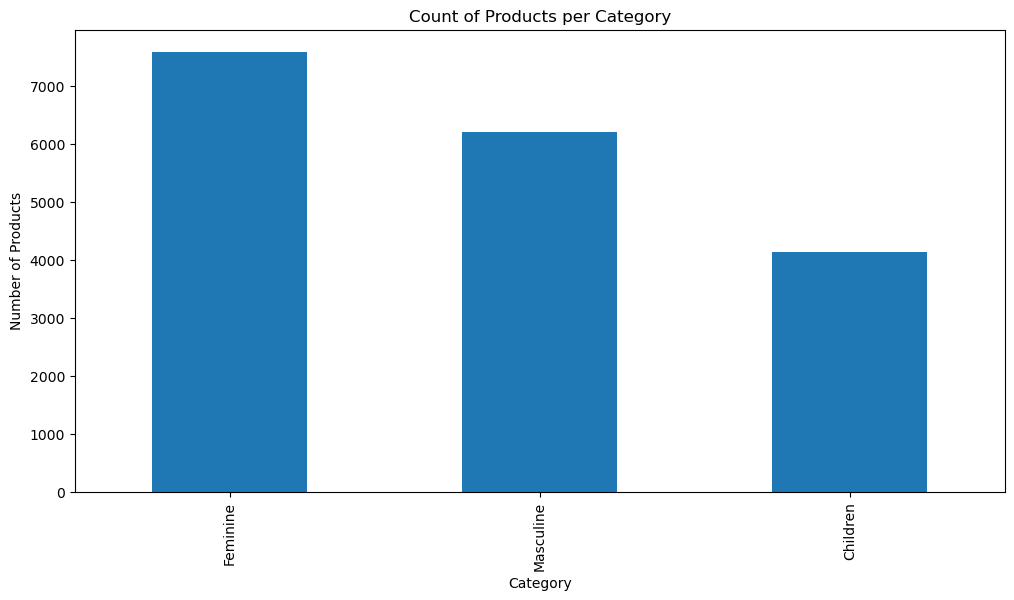

In [8]:
products_df.info()

category_counts = products_df["Category"].value_counts()

category_counts.plot(kind="bar", figsize=(12,6))

plt.xlabel("Category")
plt.ylabel("Number of Products")
plt.title("Count of Products per Category")
plt.show()

In [9]:
valid_customers = customer_df.loc[customer_df["Country"] != "CN", "Customer ID"]
transactions_no_china = transactions_df[transactions_df["Customer ID"].isin(valid_customers)].copy()
transactions_no_china.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4865532 entries, 0 to 6416826
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Customer ID     int64  
 1   Product ID      int64  
 2   Color           object 
 3   Unit Price      float64
 4   Quantity        int64  
 5   Date            object 
 6   Discount        float64
 7   Store ID        int64  
 8   Currency        object 
 9   Payment Method  object 
 10  Invoice Total   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 445.5+ MB


In [10]:
transactions_df = transactions_no_china.copy()
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4865532 entries, 0 to 6416826
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Customer ID     int64  
 1   Product ID      int64  
 2   Color           object 
 3   Unit Price      float64
 4   Quantity        int64  
 5   Date            object 
 6   Discount        float64
 7   Store ID        int64  
 8   Currency        object 
 9   Payment Method  object 
 10  Invoice Total   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 445.5+ MB


### Monthly and Seasonal Transactions

In [11]:
transactions_df['Date'] = pd.to_datetime(transactions_df['Date'])
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4865532 entries, 0 to 6416826
Data columns (total 11 columns):
 #   Column          Dtype         
---  ------          -----         
 0   Customer ID     int64         
 1   Product ID      int64         
 2   Color           object        
 3   Unit Price      float64       
 4   Quantity        int64         
 5   Date            datetime64[ns]
 6   Discount        float64       
 7   Store ID        int64         
 8   Currency        object        
 9   Payment Method  object        
 10  Invoice Total   float64       
dtypes: datetime64[ns](1), float64(3), int64(4), object(3)
memory usage: 445.5+ MB


In [12]:
month_mapping = {
    1: "January",
    2: "February",
    3: "March",
    4: "April",
    5: "May",
    6: "June",
    7: "July",
    8: "August",
    9: "September",
    10: "October",
    11: "November",
    12: "December"
}

season_mapping = {
    1: "Winter",
    2: "Winter",
    3: "Spring",
    4: "Spring",
    5: "Spring",
    6: "Summer",
    7: "Summer",
    8: "Summer",
    9: "Fall",
    10: "Fall",
    11: "Fall",
    12: "Winter"
}

In [13]:
time_series_transactions = transactions_df.copy()
time_series_transactions['Month'] = time_series_transactions['Date'].dt.month.map(month_mapping)
time_series_transactions['Year'] = time_series_transactions['Date'].dt.year
time_series_transactions['Season'] = time_series_transactions['Date'].dt.month.map(season_mapping)

In [14]:
seasonal_sales = time_series_transactions.groupby(['Year', 'Season']).size().reset_index(name='NumSales')
seasonal_pivot_table = seasonal_sales.pivot(index='Season', columns='Year', values='NumSales')
season_order = ['Winter', 'Spring', 'Summer', 'Fall']
seasonal_pivot_table = seasonal_pivot_table.reindex(season_order)

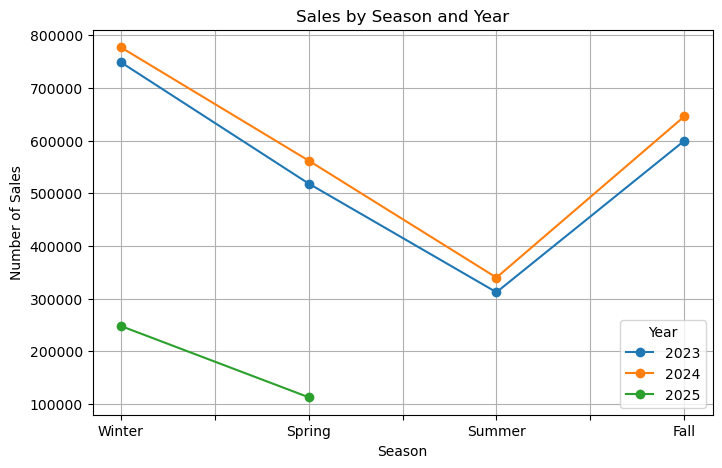

In [15]:
seasonal_pivot_table.plot(marker='o', figsize=(8,5))
plt.xlabel('Season')
plt.ylabel('Number of Sales')
plt.title('Sales by Season and Year')
plt.grid(True)
plt.show()

In [16]:
monthly_sales = time_series_transactions.groupby(['Year', 'Month']).size().reset_index(name='NumSales')
monthly_pivot_table = monthly_sales.pivot(index='Month', columns='Year', values='NumSales')

months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
monthly_pivot_table = monthly_pivot_table.reindex(months)

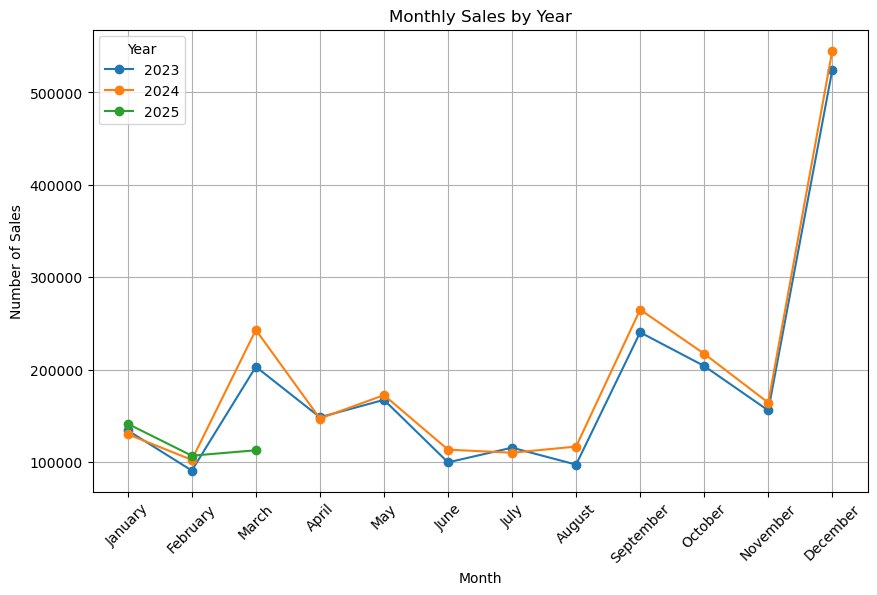

In [17]:
ax = monthly_pivot_table.plot(marker='o', figsize=(10,6))
ax.set_xlabel('Month')
ax.set_ylabel('Number of Sales')
ax.set_title('Monthly Sales by Year')
ax.set_xticks(range(len(monthly_pivot_table.index)))
ax.set_xticklabels(monthly_pivot_table.index, rotation=45) 
ax.grid(True)
plt.show()

### Monthly and seasonal transactions per category and subcategory

In [18]:
transactions_df['Season'] = time_series_transactions['Season'].copy()
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4865532 entries, 0 to 6416826
Data columns (total 12 columns):
 #   Column          Dtype         
---  ------          -----         
 0   Customer ID     int64         
 1   Product ID      int64         
 2   Color           object        
 3   Unit Price      float64       
 4   Quantity        int64         
 5   Date            datetime64[ns]
 6   Discount        float64       
 7   Store ID        int64         
 8   Currency        object        
 9   Payment Method  object        
 10  Invoice Total   float64       
 11  Season          object        
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 482.6+ MB


In [31]:
products_df['Sub Category'].unique()

array(['Coats and Blazers', 'Sweaters and Knitwear',
       'Dresses and Jumpsuits', 'Shirts and Blouses', 'T-shirts and Tops',
       'Pants and Jeans', 'Skirts and Shorts', 'Suits and Sets',
       'Sportswear', 'Lingerie and Pajamas', 'Accessories',
       'Sweaters and Sweatshirts', 'T-shirts and Polos', 'Shirts',
       'Suits and Blazers', 'Underwear and Pajamas', 'Baby (0-12 months)',
       'Girl and Boy (1-5 years, 6-14 years)', 'Coats', 'Sweaters',
       'Pajamas'], dtype=object)

In [20]:
transactions_with_products = pd.merge(transactions_df, products_df, on='Product ID', how='left')
transactions_with_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4865532 entries, 0 to 4865531
Data columns (total 16 columns):
 #   Column          Dtype         
---  ------          -----         
 0   Customer ID     int64         
 1   Product ID      int64         
 2   Color_x         object        
 3   Unit Price      float64       
 4   Quantity        int64         
 5   Date            datetime64[ns]
 6   Discount        float64       
 7   Store ID        int64         
 8   Currency        object        
 9   Payment Method  object        
 10  Invoice Total   float64       
 11  Season          object        
 12  Category        object        
 13  Sub Category    object        
 14  Description EN  object        
 15  Color_y         object        
dtypes: datetime64[ns](1), float64(3), int64(4), object(8)
memory usage: 593.9+ MB


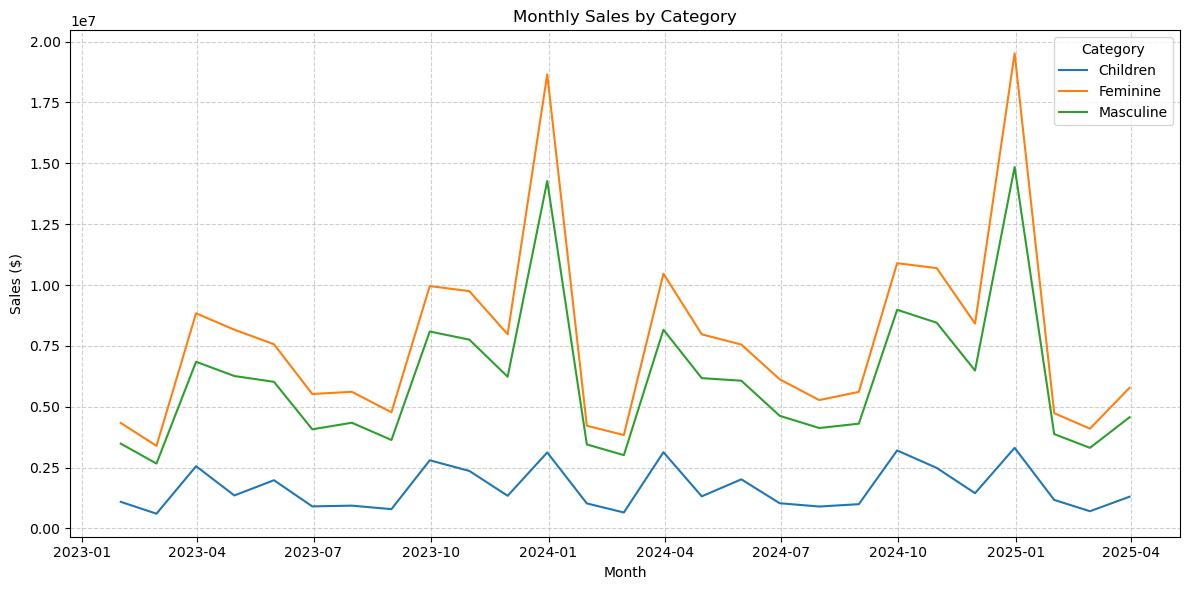

In [23]:
monthly_sales = (
    transactions_with_products
    .groupby([pd.Grouper(key="Date", freq="ME"), "Category"])["Invoice Total"]
    .sum()
    .reset_index()
)

plt.figure(figsize=(12,6))
for category in monthly_sales["Category"].unique():
    cat_data = monthly_sales[monthly_sales["Category"] == category]
    plt.plot(cat_data["Date"], cat_data["Invoice Total"], label=category)

plt.title("Monthly Sales by Category")
plt.xlabel("Month")
plt.ylabel("Sales ($)")
plt.legend(title="Category")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

C:\Users\penaf\AppData\Local\Temp\ipykernel_56192\887680456.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_sales = transactions_with_products.groupby(["Season", "Category"])["Invoice Total"].sum().reset_index()


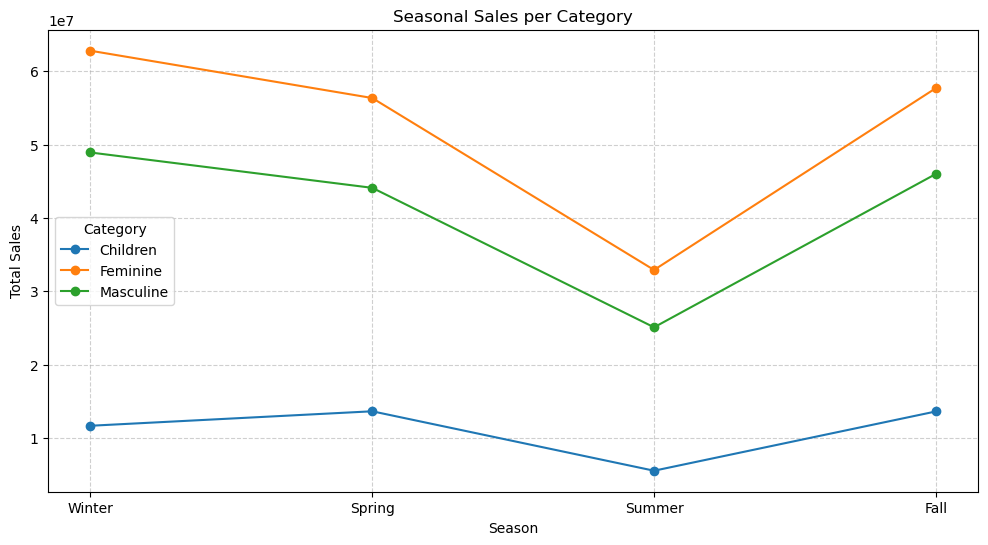

In [30]:
transactions_with_products["Season"] = pd.Categorical(transactions_with_products["Season"], categories=season_order, ordered=True)

# Aggregate total sales per Season and Category
seasonal_sales = transactions_with_products.groupby(["Season", "Category"])["Invoice Total"].sum().reset_index()

# Sort by Season so lines appear in correct order
seasonal_sales = seasonal_sales.sort_values("Season")

# Plot
plt.figure(figsize=(12,6))
for category, group in seasonal_sales.groupby("Category"):
    plt.plot(group["Season"], group["Invoice Total"], marker="o", label=category)

plt.title("Seasonal Sales per Category")
plt.xlabel("Season")
plt.ylabel("Total Sales")
plt.legend(title="Category")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

In [ ]:
category_keywords = {
    'Coats & Blazers': ['coat', 'blazer'],
    'Sweaters': ['sweater', 'knitwear'],
    'T-shirts & Polos': ['t-shirt', 'top', 'polo'],
    'Shirts': ['shirt', 'blouse'],
    'Suits & Blazers': ['suit', 'set', 'blazer'],
    'Dresses & Jumpsuits': ['dress', 'jumpsuit'],
    'Pants & Jeans': ['pant', 'jean'],
    'Skirts & Shorts': ['skirt', 'short'],
    'Sportswear': ['sport'],
    'Lingerie & Pajamas': ['pajama', 'lingerie', 'underwear'],
    'Kids': ['baby', 'girl', 'boy'],
    'Accessories': ['accessory']
}

transactions_with_products['Sub Category Cleaned'] = transactions_with_products['Sub Category']

for broad_cat, keywords in category_keywords.items():
    pattern = '|'.join(keywords)  # OR regex for all keywords
    mask = transactions_with_products['Sub Category'].str.lower().str.contains(pattern)
    transactions_with_products.loc[mask, 'Sub Category Cleaned'] = broad_cat

transactions_with_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4865532 entries, 0 to 4865531
Data columns (total 17 columns):
 #   Column                Dtype         
---  ------                -----         
 0   Customer ID           int64         
 1   Product ID            int64         
 2   Color_x               object        
 3   Unit Price            float64       
 4   Quantity              int64         
 5   Date                  datetime64[ns]
 6   Discount              float64       
 7   Store ID              int64         
 8   Currency              object        
 9   Payment Method        object        
 10  Invoice Total         float64       
 11  Season                category      
 12  Category              object        
 13  Sub Category          object        
 14  Description EN        object        
 15  Color_y               object        
 16  Sub Category Cleaned  object        
dtypes: category(1), datetime64[ns](1), float64(3), int64(4), object(8)
memory usage: 598

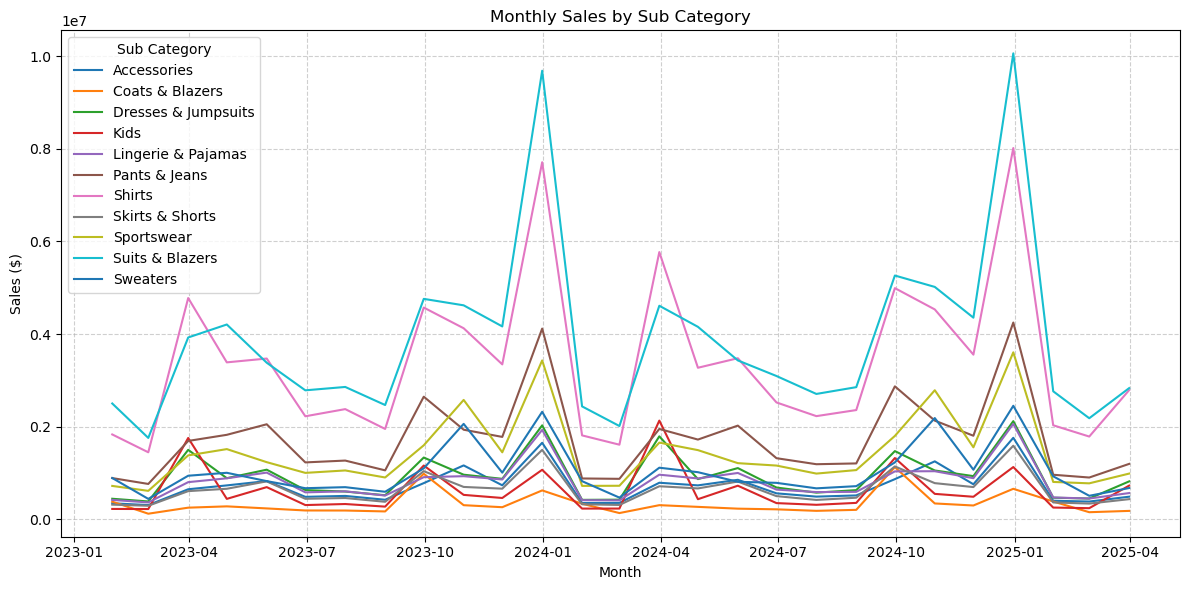

In [38]:
monthly_sales_sub = (
    transactions_with_products
    .groupby([pd.Grouper(key="Date", freq="ME"), "Sub Category Cleaned"])["Invoice Total"]
    .sum()
    .reset_index()
)

plt.figure(figsize=(12,6))
for category in monthly_sales_sub["Sub Category Cleaned"].unique():
    sub_cat_data = monthly_sales_sub[monthly_sales_sub["Sub Category Cleaned"] == category]
    plt.plot(sub_cat_data["Date"], sub_cat_data["Invoice Total"], label=category)

plt.title("Monthly Sales by Sub Category")
plt.xlabel("Month")
plt.ylabel("Sales ($)")
plt.legend(title="Sub Category")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

C:\Users\penaf\AppData\Local\Temp\ipykernel_56192\749436551.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_sub_sales = transactions_with_products.groupby(["Season", "Sub Category Cleaned"])["Invoice Total"].sum().reset_index()


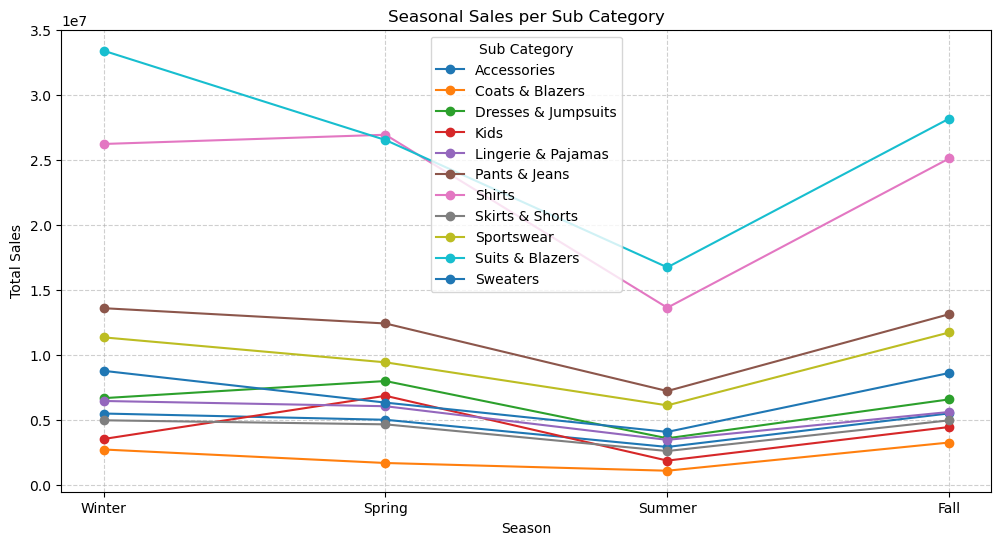

In [39]:
seasonal_sub_sales = transactions_with_products.groupby(["Season", "Sub Category Cleaned"])["Invoice Total"].sum().reset_index()

seasonal_sub_sales = seasonal_sub_sales.sort_values("Season")

plt.figure(figsize=(12,6))
for category, group in seasonal_sub_sales.groupby("Sub Category Cleaned"):
    plt.plot(group["Season"], group["Invoice Total"], marker="o", label=category)

plt.title("Seasonal Sales per Sub Category")
plt.xlabel("Season")
plt.ylabel("Total Sales")
plt.legend(title="Sub Category")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

## Music eda

In [41]:
music_info_df.describe()

,daily_rank,daily_movement,weekly_movement,popularity
count,166078.000000,166078.000000,166078.000000,166078.000000
mean,25.499109,1.077397,3.491998,80.033045
std,14.430571,7.678779,13.377901,13.830164
min,1.000000,-43.000000,-46.000000,0.000000
25%,13.000000,-1.000000,-3.000000,73.000000
50%,25.000000,0.000000,0.000000,83.000000
75%,38.000000,2.000000,6.000000,90.000000
max,50.000000,49.000000,49.000000,100.000000


### Monthly music streams per genre

### Most streamed artist per month